In [1]:
# Basic Libraries of AI
import numpy as np
import pandas as pd

# Visualization libraries
import matplotlib.pyplot as plt
import pydot
import seaborn as sns

#Evaluation library
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV

# Deep Learning libraries
import tensorflow as tf
from tensorflow.keras import layers
import keras
from keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation
from keras.datasets import mnist
from tensorflow.keras.utils import to_categorical
from scikeras.wrappers import KerasClassifier


# Digits(0-9) MNIST dataset

In [3]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

In [4]:
#x_train    # training input..

In [5]:
y_train     # training output..

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

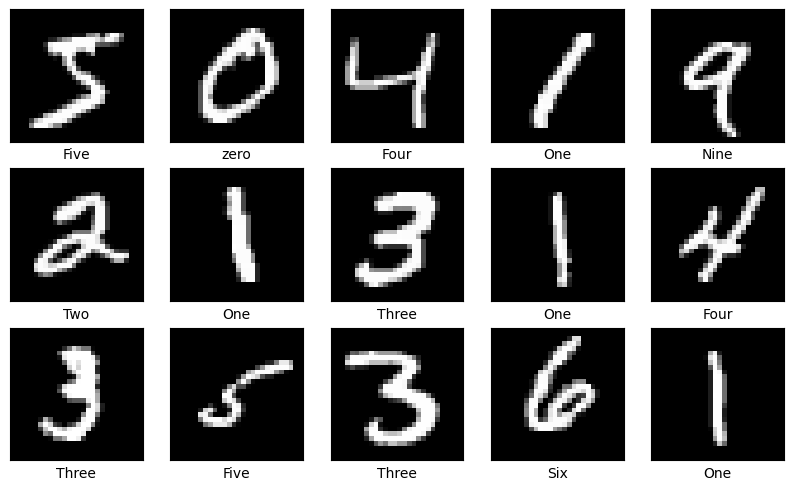

In [6]:
#Names of numbers in the dataset in order

col_names = ['zero','One','Two','Three','Four','Five','Six','Seven','Eight','Nine']

#Visualizing the digits
plt.figure(figsize=(10,10)) # overall layout(height and width) of (0-9) in "output"...
for i in range(15):
    plt.subplot(5,5,i+1)    # 5*5=15  "15 grid" in "output"  and subplots index starts at "1" not "0"...
    plt.xticks([])
    plt.yticks([])
    plt.imshow(x_train[i], cmap='gray')  # X_train_digit[i] index wise taking a matrix format(pixels) of (0-9) numbers mentioned in above cell...
    plt.xlabel(col_names[y_train[i]])    # exact matching of numbers names because it already stored in  "mnist.load_data()"......
plt.show()

In [7]:
x_train.shape   # training images=60000, 28*28=each 60000 image height* width...

(60000, 28, 28)

In [8]:
x_test.shape     # testing images=10000 , overall = 60000+10000=70000

(10000, 28, 28)

# Preprocessing

#  Converting 3d - 4d...(INPUT(X))

In [11]:
# CNN supports 4-dimension only---(batch_size, height, width, channels) channels=grayscale=1,RGB=3

x_train = x_train.reshape(x_train.shape[0], 28, 28, 1)
x_test = x_test.reshape(x_test.shape[0], 28, 28, 1)
input_shape = (28, 28, 1)

In [12]:
# most neural networks and deep learning modles perform operation well in "float"...so 

x_train = x_train.astype('float32')
x_test = x_test.astype('float32')

In [13]:
# dividing "x_train" and "y_train" by overall colour code (255)...

x_train /= 255
x_test /= 255

# Creating a Neural network(brain) using CNN

In [15]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, Dropout, Flatten, MaxPooling2D

#Convolution(CNN) part..
model = Sequential()   # sequential means "output of intial input" is a the next input...
model.add(Conv2D(28, kernel_size=(3,3), input_shape=input_shape))    # no_of_filter=28 ,size_of_filter=3*3
model.add(MaxPooling2D(pool_size=(2, 2)))   # for reducing the dimension(refer notes for pooling)...
model.add(Flatten())    # convert any dimension to 1-D for sending input to input layer of neuron..

#Neural network(fully connected) part..
model.add(Dense(128, activation=tf.nn.relu))  # "input_shape" is already mentioned above and it reduce after max pooling...
model.add(Dropout(0.2))   # reducing 0.2 from output for better performance in testing...
model.add(Dense(10,activation=tf.nn.softmax))  # output layer  with "softmax" activation function..

C:\Anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [16]:
model.summary()

#param_number = output_channel_number * (input_channel_number + 1)---Ex:128(784+1)=100,480......

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 26, 26, 28)          │             280 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 13, 13, 28)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 4732)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │         605,824 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 10)                  │           1,290 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 607,394 (2.32 MB)

 Trainable params: 607,394 (2.32 MB)

 Non-trainable params: 0 (0.00 B)

# Compiling and creating the model

In [18]:
# Compiling the model with "Hyper Tunning" parameters.... 

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])  # loss= finding error


In [63]:
# Model creation(Neural network learning)

history= model.fit(x=x_train,y=y_train, epochs=4,validation_data=(x_test, y_test))

Epoch 1/4
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 22s 12ms/step - accuracy: 0.9888 - loss: 0.0324 - val_accuracy: 0.9820 - val_loss: 0.0664
Epoch 2/4
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 21s 11ms/step - accuracy: 0.9905 - loss: 0.0289 - val_accuracy: 0.9823 - val_loss: 0.0595
Epoch 3/4
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 22s 11ms/step - accuracy: 0.9924 - loss: 0.0224 - val_accuracy: 0.9856 - val_loss: 0.0542
Epoch 4/4
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 21s 11ms/step - accuracy: 0.9937 - loss: 0.0178 - val_accuracy: 0.9852 - val_loss: 0.0596


In [65]:
#Predicting the model....

y_predict = model.predict(x_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step


In [67]:
# y_predict  # 2-D

In [69]:
y_predict[0]

array([2.04782927e-10, 4.48413084e-09, 4.08488843e-09, 4.29296527e-08,
       1.05145746e-10, 3.08551063e-14, 1.14244226e-13, 1.00000000e+00,
       2.25712071e-09, 1.46777666e-08], dtype=float32)

In [71]:
y_test  # 1-D

array([7, 2, 1, ..., 4, 5, 6], dtype=uint8)

In [73]:
# argmax() will get the index of "maximum" value in the  above encoded vector "y_predict" automatically convert (2D-1D) Again...

y_predicts=np.argmax(y_predict, axis=1)  # 2-D to 1-D
y_test= y_test     # Already in 1-D

In [75]:
y_predicts  # index == values here...(predicted output )

array([7, 2, 1, ..., 4, 5, 6], dtype=int64)

In [77]:
y_test       # index == values here...( Actual output)

array([7, 2, 1, ..., 4, 5, 6], dtype=uint8)

# Model Evaluation

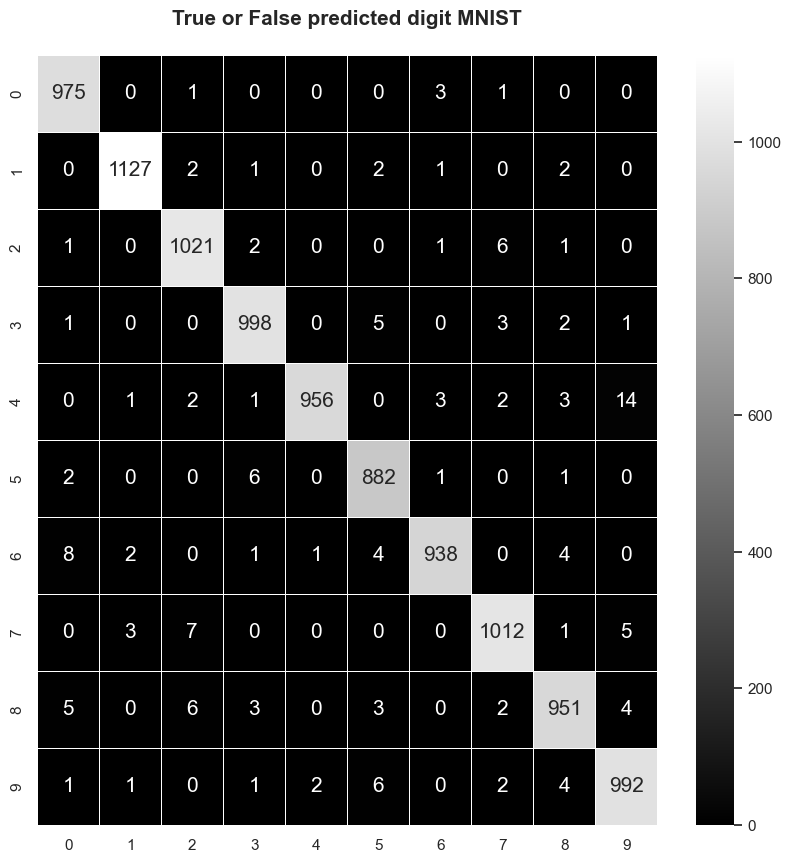

In [80]:
#Confusion matrix (Actual output - predicted output) and it's visualization...

con_mat=confusion_matrix(y_test,y_predicts)
sns.set_theme(style='darkgrid')
plt.figure(figsize=(10,10))
sns.heatmap(con_mat,annot=True,annot_kws={'size': 15},linewidths=0.5,fmt="d",cmap="gray")
plt.title('True or False predicted digit MNIST\n',fontweight='bold',fontsize=15)
plt.show() 

In [82]:
# creating "score_card" using Actual output and predicted output...

from sklearn.metrics import classification_report
print(classification_report(y_test,y_predicts))

              precision    recall  f1-score   support

           0       0.98      0.99      0.99       980
           1       0.99      0.99      0.99      1135
           2       0.98      0.99      0.99      1032
           3       0.99      0.99      0.99      1010
           4       1.00      0.97      0.99       982
           5       0.98      0.99      0.98       892
           6       0.99      0.98      0.98       958
           7       0.98      0.98      0.98      1028
           8       0.98      0.98      0.98       974
           9       0.98      0.98      0.98      1009

    accuracy                           0.99     10000
   macro avg       0.99      0.99      0.99     10000
weighted avg       0.99      0.99      0.99     10000



# Data Visulaization

In [85]:
history.history.keys()   # "history" is the variable of model creation above...

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])

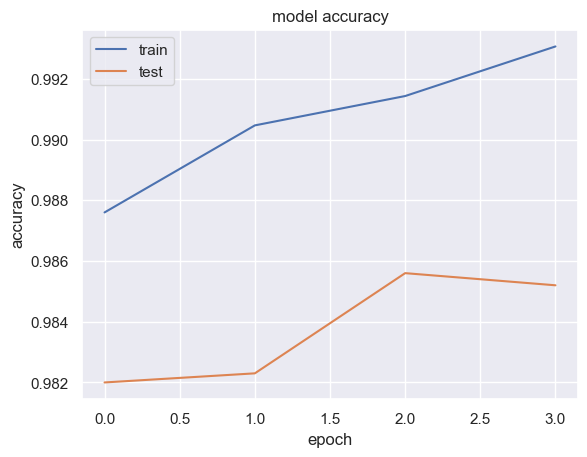

In [87]:
# summarize history for "accuracy"

plt.plot(history.history['accuracy'])  # training accuracy
plt.plot(history.history['val_accuracy']) # tesing accuracy
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='best')
plt.show()


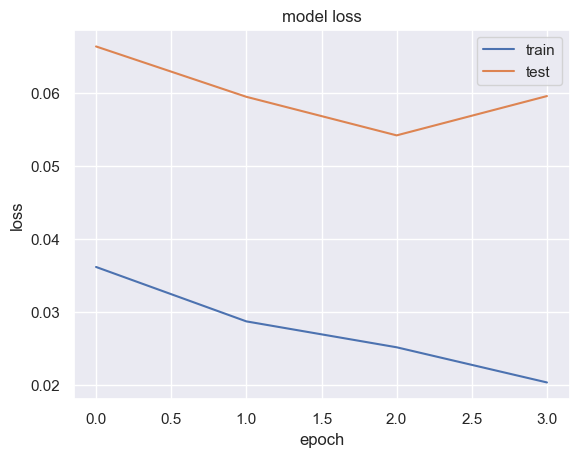

In [89]:
# summarize history for "loss function"...

plt.plot(history.history['loss'])   # training loss
plt.plot(history.history['val_loss']) # testing loss
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='best')
plt.show()